In [2]:
#read data
tgc <- read.table("sup_table2.txt",header= TRUE)

In [3]:
tgc


label,cores,size,cores_labels,N,times,sd,se,ci
10M,1,10,1,3,1325.00000,32.9089653,19.0000000,81.750402
10M,1,10,1(pl),3,2122.66667,10.1159939,5.8404718,25.129522
10M,2,10,2,3,572.33333,3.0550505,1.7638342,7.589166
10M,4,10,4,3,299.66667,1.1547005,0.6666667,2.868435
10M,8,10,8,3,166.66667,2.3094011,1.3333333,5.736870
10M,16,10,16,3,127.33333,1.1547005,0.6666667,2.868435
15M,1,15,1,3,1584.00000,27.2213152,15.7162336,67.621496
15M,1,15,1(pl),3,3196.33333,29.1433240,16.8259060,72.396030
15M,2,15,2,3,828.66667,3.0550505,1.7638342,7.589166
15M,4,15,4,3,430.00000,2.0000000,1.1547005,4.968275


In [3]:

library(ggplot2)
library(viridis)

Loading required package: viridisLite


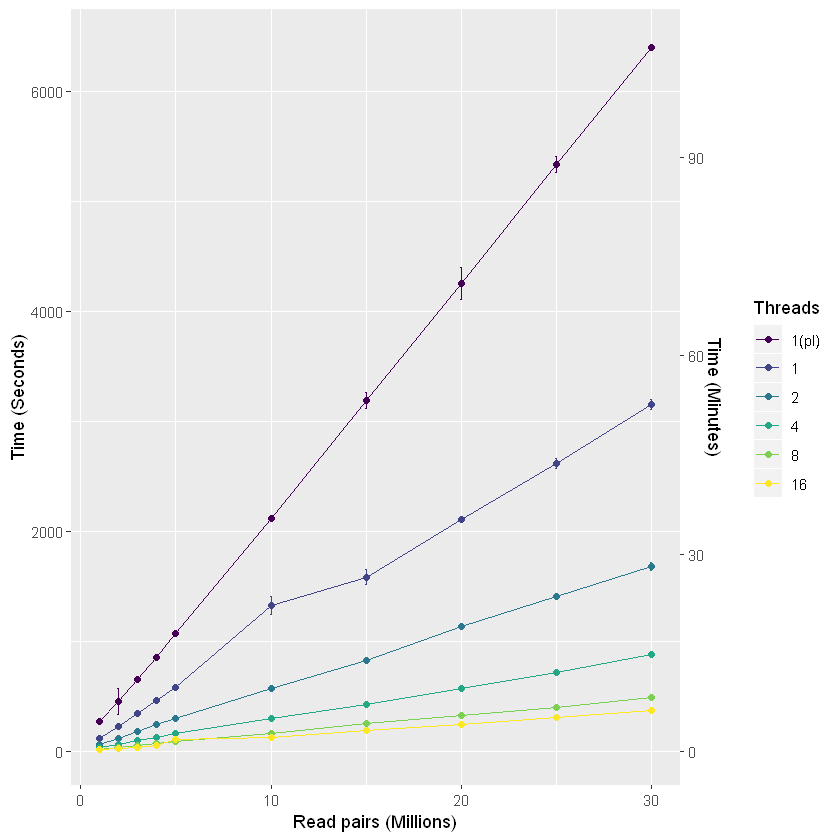

In [4]:
#ordering labels 
tgc$cores_labels <- factor(tgc$cores_labels, levels = c("1(pl)", "1", "2", "4", "8", "16"))
#plot figure
ggplot(tgc, aes(order=, x=size, y=times, colour=cores_labels)) + 
  geom_errorbar(aes(ymin=times-ci, ymax=times+ci), width=.1) +
  geom_line() + scale_color_manual(values=viridis(6)) +
  geom_point() +
  labs(colour="Threads",x="Read pairs (Millions)",y="Time (seconds)") +
  scale_y_continuous("Time (Seconds)", sec.axis = sec_axis(~./60, name = "Time (Minutes)")) +
  ggsave(filename = "figure1_temp.png", width = 12, height = 10, dpi = 1200)

In [7]:
country.code <- 'de'  # use yours
url.pattern <- 'https://'  # use http if you want
repo.data.frame <- subset(getCRANmirrors(), CountryCode == country.code & grepl(url.pattern, URL))
options(repos = repo.data.frame$URL)

In [8]:
#install.packages("magick")
library(magick)
library(magrittr)

package 'magick' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ado\AppData\Local\Temp\RtmpM1iXrX\downloaded_packages


Warning message:
"package 'magick' was built under R version 3.5.3"Linking to ImageMagick 6.9.9.14
Enabled features: cairo, freetype, fftw, ghostscript, lcms, pango, rsvg, webp
Disabled features: fontconfig, x11


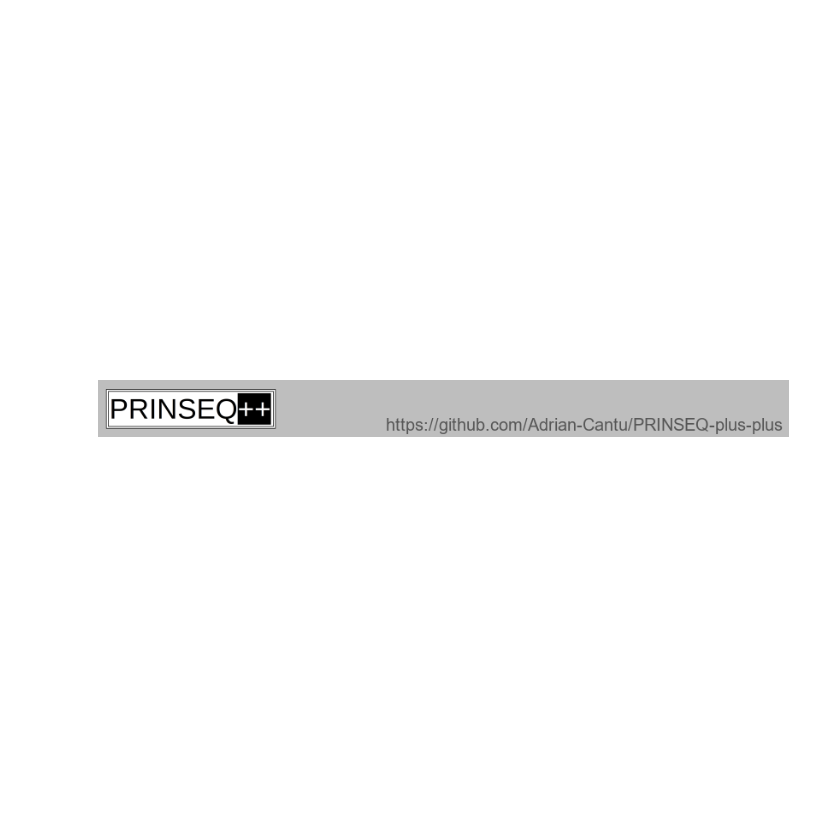

In [9]:
#download logo and add grey frame
logo_raw <- image_read("https://raw.githubusercontent.com/Adrian-Cantu/PRINSEQ-plus-plus/master/prinseq_logo.png")
logo <- logo_raw %>%
  image_scale("200") %>% 
  image_background("grey", flatten = TRUE) %>%
  image_border("grey", "600x8") %>%
 # image_frame("grey", "300x10+10+0") %>%
  image_annotate("https://github.com/Adrian-Cantu/PRINSEQ-plus-plus", color = "#565656", size = 20, 
                 location = "+7+3", gravity = "southeast")  %>%
  image_crop("808x67+592+0")

plot(logo)

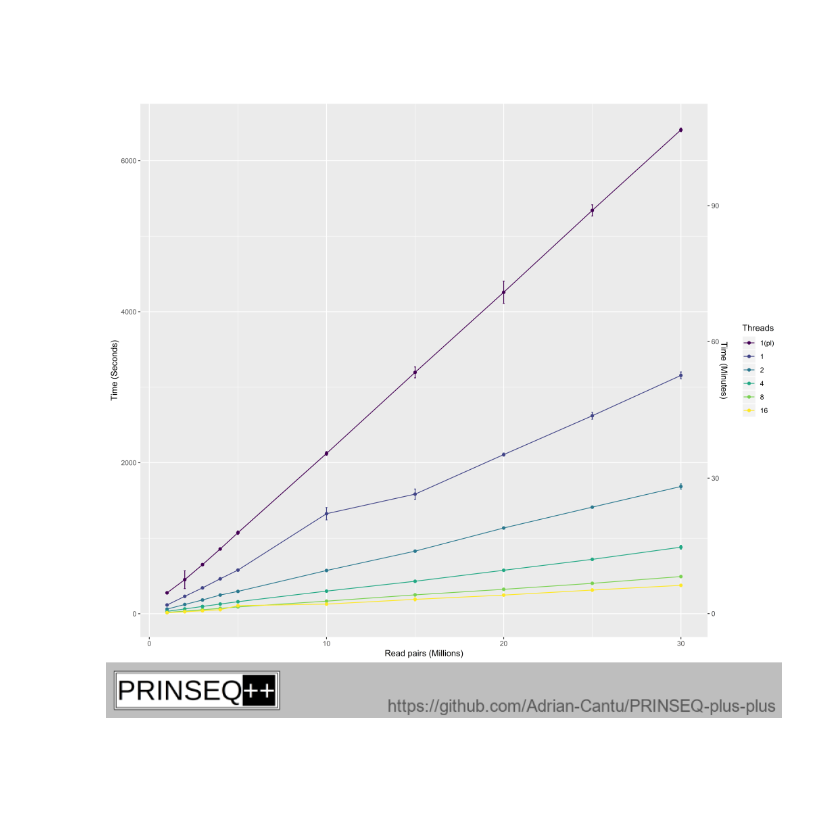

In [10]:
#paste figure and logo
plot_image<- image_read("figure1_temp.png")
final_plot <- image_append(image_scale(c(plot_image, logo), "1000"), stack = TRUE)
plot(final_plot)
image_write(final_plot,"figure1.png")